In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/becauseofliver/sample_submission.csv
/kaggle/input/becauseofliver/train.csv
/kaggle/input/becauseofliver/test.csv


In [2]:
# import libraries

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

In [3]:
# Load data

train = pd.read_csv('/kaggle/input/becauseofliver/train.csv')
test = pd.read_csv('/kaggle/input/becauseofliver/test.csv')

In [4]:
# Preview train data

train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
# Preview test data

test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [6]:
# Split features and labels

X = train.drop(['Status'], axis=1)
y = train['Status']

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

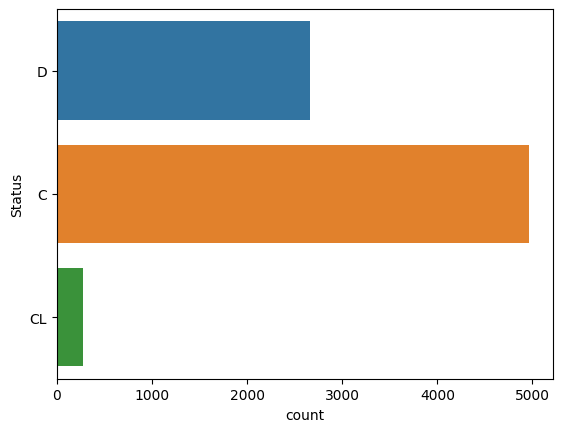

In [7]:
# visualize truth label

g = sns.countplot(y=y)

y.value_counts()

In [8]:
# Define categorical features for encoding

categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


# Apply OneHotEncoding on categorical features

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(X[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and add encoded columns

X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_features], axis=1)

# Apply the same encoding on test data

encoded_test_features = pd.DataFrame(encoder.transform(test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
test = test.drop(categorical_features, axis=1)
test = pd.concat([test, encoded_test_features], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Train, validation, test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.75, random_state=42)

In [10]:
# Model training

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 81.96%


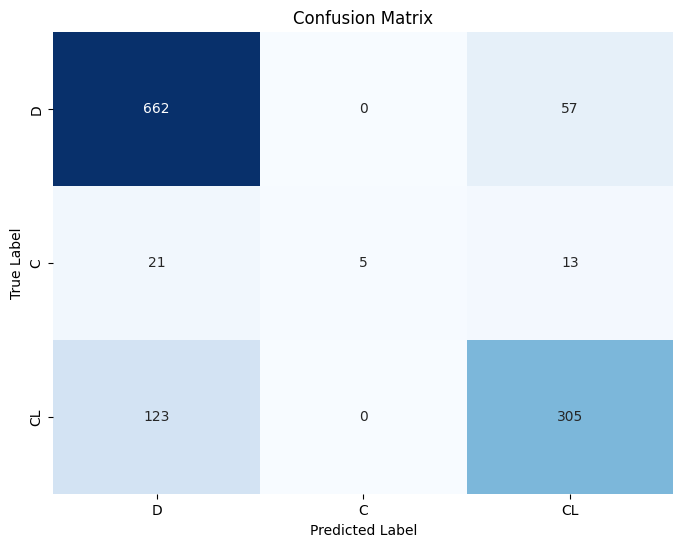

In [11]:
# Model prediction and evaluation

y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print test accuracy

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion Matrix visualization (matching label order)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['D', 'C', 'CL'], yticklabels=['D', 'C', 'CL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
# Predictions for submission

final_predictions_proba = model.predict_proba(test)  # Predict probabilities for test.csv

# Convert predictions to a DataFrame with appropriate column names

submission = pd.DataFrame(final_predictions_proba, columns=['LiverStatus_C', 'LiverStatus_D', 'LiverStatus_CL'])

# Add the 'id' column from test dataset to submission DataFrame

submission['id'] = test['id']
submission = submission[['id', 'LiverStatus_C', 'LiverStatus_D', 'LiverStatus_CL']]

# Save the submission file

submission.to_csv('submission.csv', index=False)

print('Baseline submission file created: submission.csv')


Baseline submission file created: submission.csv


In [13]:
# Display the first few rows of the submission file

submission.head()

,id,LiverStatus_C,LiverStatus_D,LiverStatus_CL
0,7905,0.61,0.05,0.34
1,7906,0.73,0.14,0.13
2,7907,0.13,0.09,0.78
3,7908,0.85,0.00,0.15
4,7909,0.64,0.08,0.28
